# 20152410_배형준_머신러닝_과제3

In [1]:
# library import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# 1. Input points

load csv file using read_csv in pandas and make plot of data points

In [2]:
# set my local working directory

import os

directory = 'C:\\Users\\golds\\Desktop\\중앙대학교\\2020-1 4학년 1학기\\머신러닝'
os.chdir(directory)

In [3]:
file_directory = './과제3/data.csv'
data = pd.read_csv(file_directory, header=None)
data.columns = ['X', 'Y']
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
data.head()

,X,Y
0,-5.518410,-18.426116
1,7.063695,100.441003
2,-8.515615,-57.190307
3,-4.962353,-20.424181
4,-4.435724,-26.448666


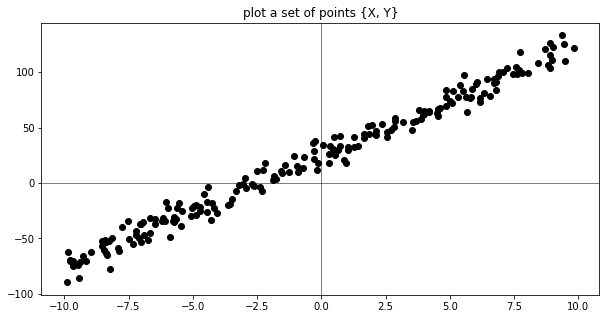

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(X, Y, 'ko') # scatter plot
plt.axhline(y=0, color='k', linewidth=0.5) # x axis
plt.axvline(x=0, color='k', linewidth=0.5) # y axis
plt.title('plot a set of points {X, Y}')
plt.show()

# 2. Linear regression result

use my user definition function make_regression which was made at assignment 2

In [5]:
def make_regression(X, Y):
    
    # set random initial condition of parameters
    
    m = len(Y)

    initial_theta_0 = np.random.randn(1)
    initial_theta_1 = np.random.randn(1)
    list_theta_0 = [initial_theta_0]
    list_theta_1 = [initial_theta_1]
    
    initial_loss = np.sum((initial_theta_0 + initial_theta_1 * X - Y)**2) / (2*m)
    list_loss = [initial_loss]

    temp_theta_0 = initial_theta_0
    temp_theta_1 = initial_theta_1
    temp_loss = initial_loss
    
    learning_rate = 0.01
    error_bound = 0.00001

    # model learning

    while True:
        # calculate gradient
        gradient_theta_0 = np.sum(temp_theta_0 + temp_theta_1 * X - Y) / m
        gradient_theta_1 = np.sum((temp_theta_0 + temp_theta_1 * X - Y) * X) / m
    
        # renew the parameters
        next_theta_0 = temp_theta_0 - learning_rate * gradient_theta_0
        next_theta_1 = temp_theta_1 - learning_rate * gradient_theta_1
    
        temp_theta_0 = next_theta_0
        temp_theta_1 = next_theta_1
    
        # calculate loss to evaluate the parameters
        next_loss = np.sum((next_theta_0 + next_theta_1 * X - Y)**2) / (2*m)
    
        # store results
        list_theta_0.append(next_theta_0)
        list_theta_1.append(next_theta_1)
        list_loss.append(next_loss)
    
        # stopping rule
        if temp_loss - next_loss < error_bound:
            break
    
        temp_loss = next_loss
    
    theta_0_hat = list_theta_0[-1]
    theta_1_hat = list_theta_1[-1]
    
    return theta_0_hat, theta_1_hat, list_theta_0, list_theta_1, list_loss

In [6]:
theta_0_hat, theta_1_hat, list_theta_0, list_theta_1, list_loss = make_regression(X, Y)

In [7]:
print(' My linear regression model estimates the paramaters as follows. \n theta_0 : {}, theta_1 : {}'
      .format(theta_0_hat, theta_1_hat))

 My linear regression model estimates the paramaters as follows. 
 theta_0 : [24.87608368], theta_1 : [9.93415342]


In [8]:
# get fitted values for making plot

Y_hat = theta_0_hat + theta_1_hat * X

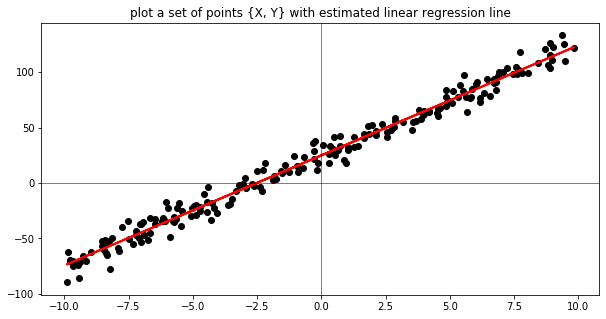

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(X, Y, 'ko') # scatter plot
plt.plot(X, Y_hat, 'r', linestyle='-', linewidth=2) # estimated linear regression line
plt.axhline(y=0, color='k', linewidth=0.5) # x axis
plt.axvline(x=0, color='k', linewidth=0.5) # y axis
plt.title('plot a set of points {X, Y} with estimated linear regression line')
plt.show()